In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## O comando a seguir é utilizado para que os plots funcionem corretamente dentro do jupyter-notebook

In [2]:
%matplotlib inline

## A seguir, vamos ler a base de dados para um dataframe <i>df</i> e imprimir as 10 primeiras linhas do banco

In [3]:
df = pd.read_csv("students_final.csv")

In [4]:
df.head(10)

,Unnamed: 0,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education
0,0,0,0,1,0,72,72,74,0
1,1,0,1,1,1,69,90,88,1
2,2,0,0,1,0,90,95,93,2
3,3,1,2,0,0,47,57,44,3
4,4,1,1,1,0,76,78,75,1
5,5,0,0,1,0,71,83,78,3
6,6,0,0,1,1,88,95,92,1
7,7,1,0,0,0,40,43,39,1
8,8,1,3,0,1,64,64,67,4
9,9,0,0,0,0,38,60,50,4


## Vamos começar com os gráficos. Primeiramente, vamos explorar como foram as notas do teste de matemática

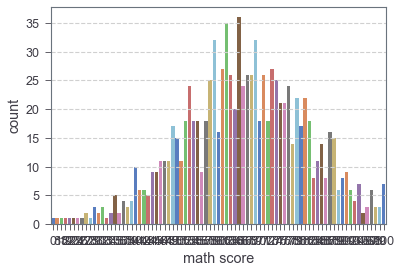

In [5]:
p = sns.countplot(x="math score", data = df, palette="muted")

### Este gráfico não nos ajuda muito, pois a informação referente as notas esta toda amontoada... Para resolver este problema, podemos atribuir um tamanho para a imagem, tal como rotacionar as labels do eixo <i>X</i> para que caiba melhor no espaço.

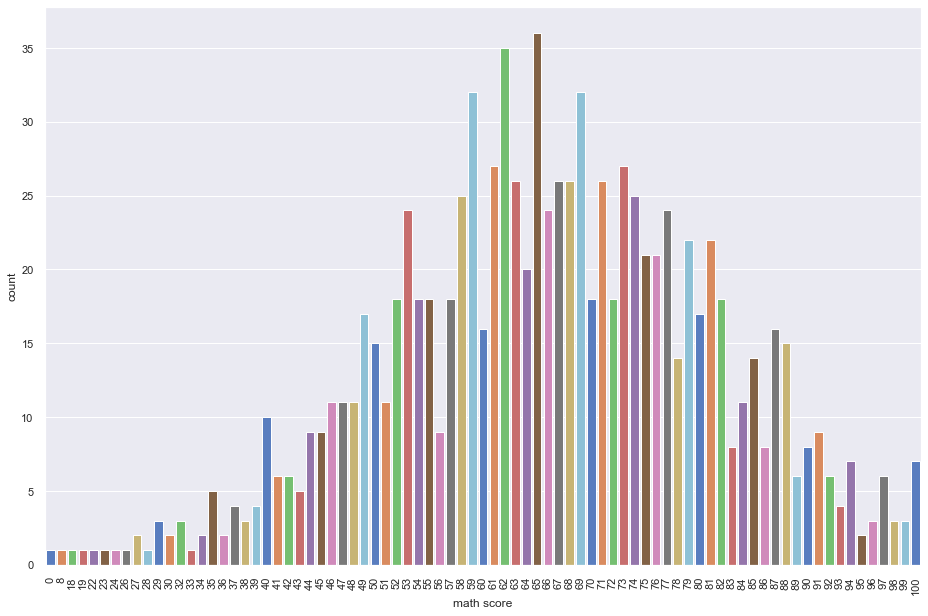

In [6]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Bem melhor, não? Agora podemos ver que a maioria dos alunos (mais de 35) obteve nota 65. Mas e se quisessemos saber quantos alunos obtiveram nota para passar? Supondo que a média fosse 60, poderiamos usar a série de comandos a seguir:


In [7]:
"""
1)
Inserimos em 'df', na posição 5 (logo após 'math_score'), uma nova coluna chamada "math_pass_status"
onde o valor de cara linha será 0, caso a média da coluna 'math_score'
seja menor do que 60, ou 1, caso seja maior. 

2)
realizamos a contagem de valores distintos existentes no dataframe
"""

df.insert(5, "math_pass_status", np.where(df['math score']<60, 0, 1))

df.math_pass_status.value_counts()

1    677
0    323
Name: math_pass_status, dtype: int64

### Agora podemos ver que tivemos 677 alunos aprovados e 323 reprovados. Porém, e com relação a leitura (reading_score) e escrita (writing_score)?

## 1) Writing score plot

## Vamos imprimir a primeira linha de 'df' para ver a ordem das features

In [8]:
df.head(1)

,Unnamed: 0,gender,race/ethnicity,lunch,test preparation course,math_pass_status,math score,reading score,writing score,parental level of education
0,0,0,0,1,0,1,72,72,74,0


In [9]:
df.insert(8, "writing_pass_score", np.where(df['writing score']<60, 0, 1))

df.writing_pass_score.value_counts()

1    719
0    281
Name: writing_pass_score, dtype: int64

## 2) Reading_score plot

In [10]:
df.head(1)

,Unnamed: 0,gender,race/ethnicity,lunch,test preparation course,math_pass_status,math score,reading score,writing_pass_score,writing score,parental level of education
0,0,0,0,1,0,1,72,72,1,74,0


In [11]:
df.insert(8, "reading_pass_score", np.where(df['reading score']<60, 0, 1))

df.reading_pass_score.value_counts()

1    746
0    254
Name: reading_pass_score, dtype: int64

In [12]:
df.head()

,Unnamed: 0,gender,race/ethnicity,lunch,test preparation course,math_pass_status,math score,reading score,reading_pass_score,writing_pass_score,writing score,parental level of education
0,0,0,0,1,0,1,72,72,1,1,74,0
1,1,0,1,1,1,1,69,90,1,1,88,1
2,2,0,0,1,0,1,90,95,1,1,93,2
3,3,1,2,0,0,0,47,57,0,0,44,3
4,4,1,1,1,0,1,76,78,1,1,75,1


## Agora, vamos gerar um plot um pouco mais complexo, imprimindo o total de estudantes que passaram em matemática de acordo com o grau de instrução dos pais

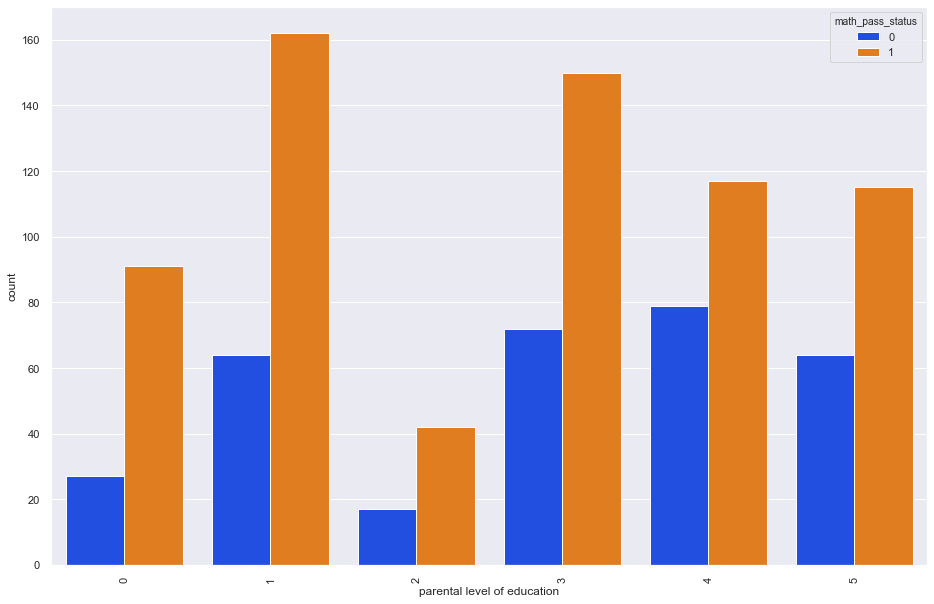

In [13]:
p = sns.countplot(x='parental level of education', data = df, hue='math_pass_status', palette='bright',)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

## Agora o total de estudantes que passaram em leitura de acordo com o grau de instrução dos pais

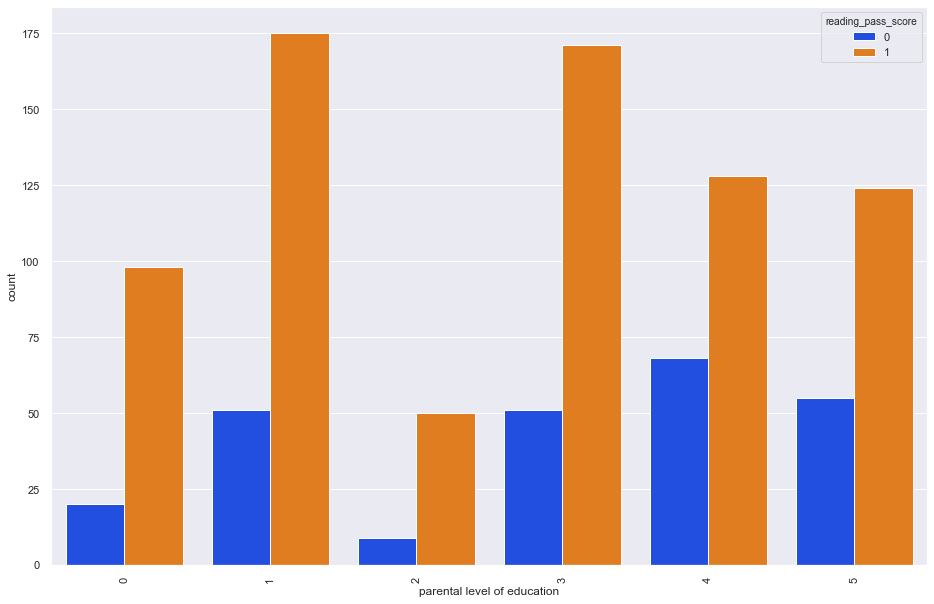

In [31]:
p = sns.countplot(x='parental level of education', data = df, hue='reading_pass_score', palette='bright',)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

## Agora o total de estudantes que passaram em escrita de acordo com o grau de instrução dos pais

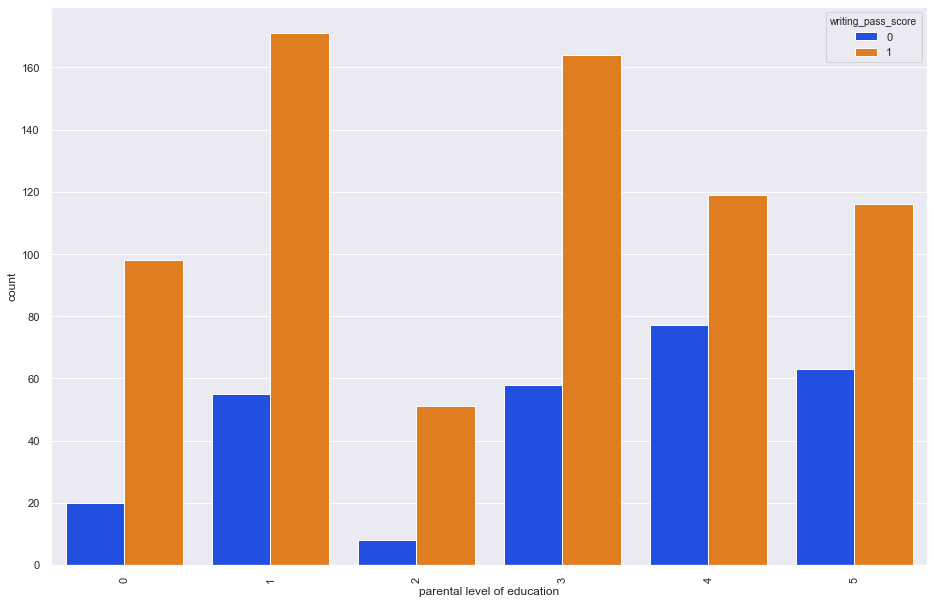

In [32]:
p = sns.countplot(x='parental level of education', data = df, hue='writing_pass_score', palette='bright',)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

## Por fim, vamos verificar quantos estudantes passaram em todas as provas, criando uma entrada em nosso dataframe 'df' chamada 'overall_pass_status'

In [33]:
df.head(1)

,Unnamed: 0,gender,race/ethnicity,lunch,test preparation course,math_pass_status,math score,reading score,reading_pass_score,writing_pass_score,writing score,parental level of education
0,0,0,0,1,0,1,72,72,1,1,74,0


In [34]:
df.insert(10, "overall_pass_status", df.apply(lambda x : 0 if x['math_pass_status'] == 0 or 
                                    x['reading_pass_score'] == 0 or x['writing_pass_score'] == 0 else 1, axis =1))
df.overall_pass_status.value_counts()

1    603
0    397
Name: overall_pass_status, dtype: int64

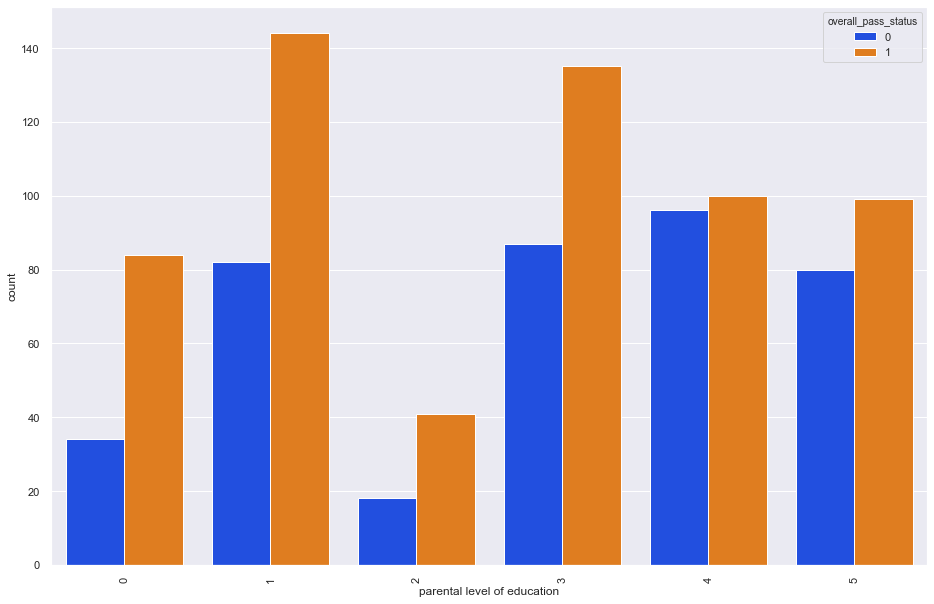

In [35]:
p = sns.countplot(x='parental level of education', data = df, hue='overall_pass_status', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [39]:
df.columns

Index(['Unnamed: 0', 'gender', 'race/ethnicity', 'lunch',
       'test preparation course', 'math_pass_status', 'math score',
       'reading score', 'reading_pass_score', 'writing_pass_score',
       'overall_pass_status', 'writing score', 'parental level of education'],
      dtype='object')

In [40]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [63]:
%matplotlib inline
import IPython

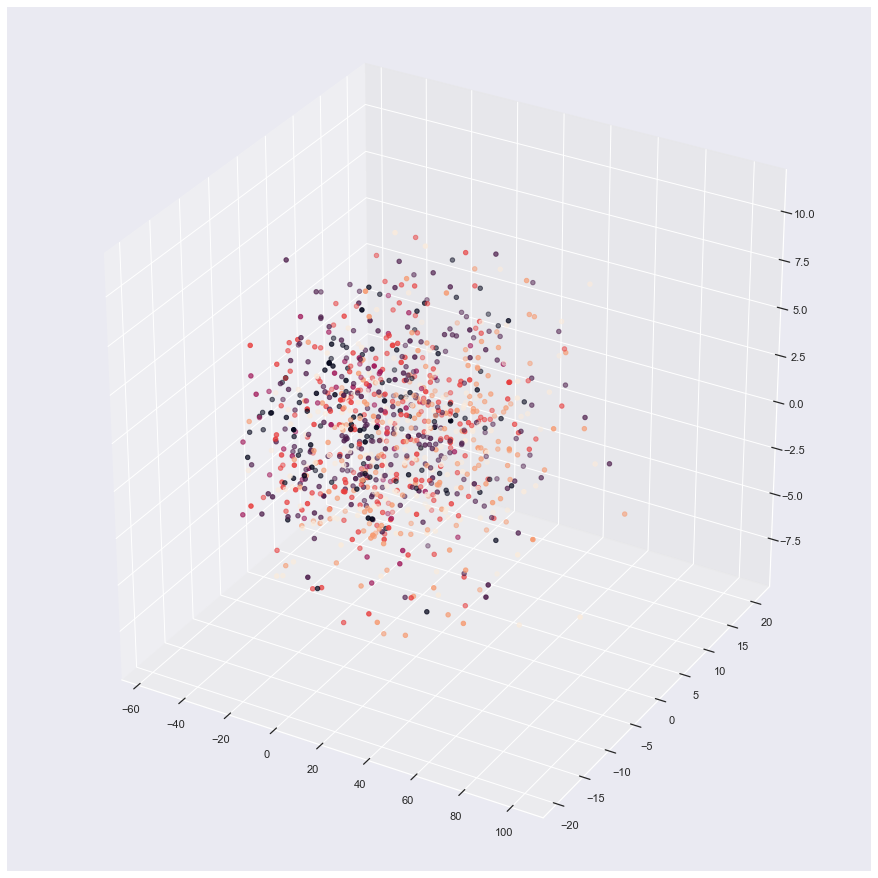

In [74]:
X = df[['gender', 'race/ethnicity', 'lunch',
       'test preparation course', 'math score',
       'reading score','writing score']]
y = df.iloc[:,-1]
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
# efetuando o PCA para o máximo de 3 variáveis
pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(X)

# mostrando o gráfico
fig = plt.figure(1, figsize=(12, 12))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)


# Parágrafo relatando algumas conclusões:

### Considerando os seguintes valores para o nivel de educação parental:
<code>
{"bachelor's degree":0, 'some college':1, "master's degree":2,
       "associate's degree":3, 'high school':4, 'some high school':5}
</code>

- Em todas as categorias as maiores chances de passar foram de Pais com algum estudo, seguido por Associates Degreee, High Scholl, some high school, bachelor degree, e por ultimo Master degree.

- É espantoso que quanto maior o nivel de educação dos pais menor a chance do filho passar em todas/quaisquer matérias

- Seria a facilidade de vida, heranças influencia no esforço de alunos?
- A vizualização 3d foi problematica